<h1>Index<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimization-params" data-toc-modified-id="Optimization-params-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimization params</a></span></li><li><span><a href="#Random-Time-Robust-Forest" data-toc-modified-id="Random-Time-Robust-Forest-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Time Robust Forest</a></span><ul class="toc-item"><li><span><a href="#Few-random-segments" data-toc-modified-id="Few-random-segments-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Few random segments</a></span></li><li><span><a href="#Many-random-segments" data-toc-modified-id="Many-random-segments-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Many random segments</a></span></li><li><span><a href="#A-couple-of-engineered-segments" data-toc-modified-id="A-couple-of-engineered-segments-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>A couple of engineered segments</a></span></li></ul></li><li><span><a href="#Benchmark" data-toc-modified-id="Benchmark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Benchmark</a></span></li><li><span><a href="#Time-Robust-Forest" data-toc-modified-id="Time-Robust-Forest-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Time Robust Forest</a></span></li><li><span><a href="#Simplified-benchmark" data-toc-modified-id="Simplified-benchmark-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simplified benchmark</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Domain-Classifier" data-toc-modified-id="Domain-Classifier-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Domain Classifier</a></span></li></ul></li></ul></div>

# GE News - Time Forest Vs Random Forest

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import pdb
import warnings
import seaborn as sns

from sklearn import metrics
from time import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, f1_score, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import TfidfVectorizer
from time_robust_forest.models import TimeForestClassifier
from time_robust_forest.functions import check_categoricals_match, check_numerical_match
from time_robust_forest.hyper_opt import env_wise_hyper_opt
from aux_functions import *

warnings.filterwarnings('ignore')

In [3]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-paper'])
    plt.rcParams['figure.figsize'] = (12, 4)

In [4]:
set_style()

In [5]:
PREFIX = "ge_news"

In [6]:
STOP_WORDS = ['de', 'a', 'o', 'que', 'e', 'do', 'da', 'em', 'um', 'para', 'é', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'foi', 'ao', 'ele', 'das', 'tem', 'à', 'seu', 'sua', 'ou', 'ser', 'quando', 'muito', 'há', 'nos', 'já', 'está', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'era', 'depois', 'sem', 'mesmo', 'aos', 'ter', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'estão', 'você', 'tinha', 'foram', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'têm', 'numa', 'pelos', 'elas', 'havia', 'seja', 'qual', 'será', 'nós', 'tenho', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'fosse', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estivermos', 'estiverem', 'hei', 'há', 'havemos', 'hão', 'houve', 'houvemos', 'houveram', 'houvera', 'houvéramos', 'haja', 'hajamos', 'hajam', 'houvesse', 'houvéssemos', 'houvessem', 'houver', 'houvermos', 'houverem', 'houverei', 'houverá', 'houveremos', 'houverão', 'houveria', 'houveríamos', 'houveriam', 'sou', 'somos', 'são', 'era', 'éramos', 'eram', 'fui', 'foi', 'fomos', 'foram', 'fora', 'fôramos', 'seja', 'sejamos', 'sejam', 'fosse', 'fôssemos', 'fossem', 'for', 'formos', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seríamos', 'seriam', 'tenho', 'tem', 'temos', 'tém', 'tinha', 'tínhamos', 'tinham', 'tive', 'teve', 'tivemos', 'tiveram', 'tivera', 'tivéramos', 'tenha', 'tenhamos', 'tenham', 'tivesse', 'tivéssemos', 'tivessem', 'tiver', 'tivermos', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teríamos', 'teriam']
CLUB_WORDS = ["verdão", "tricolor", "fla", "timão", "rubro", 
              "negro", "flamengo", "paulo", "palmeirense", "paulista", 
              "inter", "colorado", "internacional", "colorados", "colorada"]
STOP_WORDS += CLUB_WORDS
MAX_VOCABULARY = 300#300
positive_case = "flamengo"

In [7]:
data = pd.read_csv("~/Documents/datasets/ge_news/ge_news.csv", index_col=False)

In [8]:
data.shape

(171764, 6)

In [9]:
data = data.sample(frac=1.0)

In [10]:
data.tail()

,date,time,title,text,link,club
381,24/07/2019,15h37,Lista GE: oito posts e campanhas de clubes que...,Você possivelmente deve ter visto que o Goiás...,https://globoesporte.globo.com/futebol/noticia...,athletico-pr
21037,01/06/2017,20h00,"Estreia no vôlei, Série B, amistoso da França ...","Nesta sexta-feira, o SporTV terá muita ação no...",http://sportv.globo.com/site/programas/sportv-...,atletico-mg
58565,05/12/2017,10h30,Presidente do Corinthians descarta contratação...,"Mais tarde, o clube anunciou a contratação de...",https://globoesporte.globo.com/futebol/times/c...,corinthians
36539,21/01/2020,17h52,Atuações do Botafogo: Caio Alexandre chama a r...,O volante leva a maior nota no time alvinegro...,https://globoesporte.globo.com/futebol/times/b...,botafogo
61652,03/07/2021,22h04,"Presidente do Coritiba, Renato Follador morre ...",Morreu na noite deste sábado o presidente do ...,https://ge.globo.com/pr/futebol/times/coritiba...,coritiba


In [11]:
data.isna().sum()

date     0
time     0
title    0
text     0
link     0
club     0
dtype: int64

In [12]:
#data = data.sample(frac=0.2)
data.reset_index(drop=True, inplace=True)

In [13]:
def create_different_time_slices(data, time_col="date", aggregation="weekly", n_months=None):
    if aggregation == "daily": return data[time_col].dt.date
    if aggregation == "weekly": return data[time_col].dt.week
    if aggregation == "monthly": return data[time_col].apply(lambda x: x.strftime("%Y-%m"))
    if aggregation == "semester": return False


def exclude_periods_without_positive_case(data, positive_case, period_column, threshold=20):
    df = data.groupby(period_column)["club"].apply(lambda x: np.sum(x == positive_case))
    df = df[df > threshold]
    return data[data[period_column].isin(df.index)]
    
def clean_club_name_from_article(data):
    data["text"] = data.apply(lambda x: x["text"].lower().replace(x["club"].replace("-", " "), ""), axis=1)
    return data

def exclude_numbers(data):
    data["text"] = data["text"].apply(lambda x: ''.join([i for i in x.lower() if not i.isdigit()]))
    return data

def drop_multiple_teams_news(data):
    multiple_team_news = data.groupby("link", as_index=False)["club"].count()
    multiple_team_news = multiple_team_news[multiple_team_news["club"] > 1]["link"]
    return data[~data["link"].isin(multiple_team_news)]


In [14]:
data = clean_club_name_from_article(data)
data = exclude_numbers(data)
data = drop_multiple_teams_news(data)

In [15]:
data.loc[:, "year"] = data["date"].apply(lambda x: x.split("/")[-1])
data.loc[:, "month"] = data["date"].apply(lambda x: x.split("/")[1])
data.loc[:, "date"] = pd.to_datetime(data["date"])

In [16]:
### Monthly context
data["year-month"] = data["year"] + "-" + data["month"]

### Weekly context
data["year-week"] = create_different_time_slices(data)
data["year-week"] = data["year"] + "-" + data["year-week"].astype(str)

In [17]:
data["target"] = data["club"].apply(lambda x: 1 if x == positive_case else 0)

print("The fraction of positive cases is {:.2f}".format(data["target"].mean()))

The fraction of positive cases is 0.08


In [18]:
data = exclude_periods_without_positive_case(data, positive_case, "year-month")

In [19]:
train_end_date = "2019-01"
holdout_end_date = "2022-06"
train_end_year = int(train_end_date.split("-")[0])

In [20]:
in_time = data[data["year-month"] < train_end_date]

train, test = train_test_split(in_time, 
                               test_size=0.2, 
                               random_state=42)

out_of_time = data[(data["year-month"] >= train_end_date) & (data["year-month"] <= holdout_end_date)]

In [21]:
target = "target"
time_column = "year-month"
time_column = "year"
dummy_time_column = "dummy_date"

In [22]:
print("Dataset shapes:")
print("Train: {}".format(train.shape))
print("Test: {}".format(test.shape))
print("Out of time: {}".format(out_of_time.shape))

Dataset shapes:
Train: (33397, 11)
Test: (8350, 11)
Out of time: (82111, 11)


In [23]:
vectorizer = TfidfVectorizer(max_features=MAX_VOCABULARY,
                             stop_words=STOP_WORDS,
                             binary=False,
                             use_idf=True,
                             norm=False)

train_vectors = pd.DataFrame(vectorizer.fit_transform(train["text"]).toarray(), columns=vectorizer.vocabulary_)
test_vectors = pd.DataFrame(vectorizer.transform(test["text"]).toarray(), columns=vectorizer.vocabulary_)
oot_vectors = pd.DataFrame(vectorizer.transform(out_of_time["text"]).toarray(), columns=vectorizer.vocabulary_)

In [24]:
features = list(vectorizer.vocabulary_.keys())

In [25]:
train_vectors[time_column] = train[time_column].values
test_vectors[time_column] = test[time_column].values
oot_vectors[time_column] = out_of_time[time_column].values

In [26]:
train_vectors[dummy_time_column] = 1
train_vectors["date"] = train["date"].values
train_vectors["year-month"] = train["year-month"].values

In [27]:
train_vectors.reset_index(drop=True, inplace=True)
test_vectors.reset_index(drop=True, inplace=True)
oot_vectors.reset_index(drop=True, inplace=True)

In [38]:
model = RandomForestClassifier(max_depth=15, n_estimators=300)

In [39]:
model.fit(train_vectors.drop(columns=[time_column, dummy_time_column, "date", "year-month"]), train["target"].values)

RandomForestClassifier(max_depth=15, n_estimators=300)

In [40]:
train["prediction"] = model.predict_proba(train_vectors.drop(columns=[time_column, dummy_time_column, "date", "year-month"]))[:, 1]
roc_auc_score(train[target], train["prediction"])

0.9737159812091059

In [41]:
test["prediction"] = model.predict_proba(test_vectors.drop(columns=[time_column]))[:, 1]
roc_auc_score(test[target], test["prediction"])

0.9023257327666271

In [42]:
out_of_time["prediction"] = model.predict_proba(oot_vectors.drop(columns=[time_column]))[:, 1]
roc_auc_score(out_of_time[target], out_of_time["prediction"])

0.8066389884277921

## Optimization params

In [43]:
# params_grid = {"n_estimators": [30], 
#               "max_depth": [5, 10, 15],
#               "min_impurity_decrease": [1e-3, 0],
#               "min_sample_periods": [1, 5, 10],
#               "period_criterion": ["max", "avg"]}

params_grid = {"n_estimators": [300], 
              "max_depth": [10, 15],
              "min_impurity_decrease": [0, 0.0001],
              "min_sample_periods": [1, 5, 10],
              "period_criterion": ["max", "avg"]}

params_grid_benchmark = params_grid.copy()
params_grid_benchmark.pop("period_criterion")

['max', 'avg']

## Random Time Robust Forest

### Few random segments

In [44]:
challenger_opt_param = {'max_depth': 10,
 'min_impurity_decrease': 0.0001,
 'min_sample_periods': 1,
 'n_estimators': 300,
 'period_criterion': 'max'}

In [45]:
time_stamp = "date"

r_few_challenger_model = TimeForestClassifier(time_column=time_stamp,
                                       multi=True, 
                                       random_segments=5,
                                       **challenger_opt_param)

r_few_challenger_model.fit(train_vectors[features + [time_stamp]], train[target])

In [46]:
train["r_few_challenger_prediction"] = r_few_challenger_model.predict_proba(train_vectors[features])[:, 1]
test["r_few_challenger_prediction"] = r_few_challenger_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["r_few_challenger_prediction"] = r_few_challenger_model.predict_proba(oot_vectors[features])[:, 1]

In [47]:
print(roc_auc_score(train[target], train["r_few_challenger_prediction"]))
print(roc_auc_score(test[target], test["r_few_challenger_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["r_few_challenger_prediction"]))

0.8994453129832695
0.8893132032933089
0.8218064776183499


In [48]:
importance = r_few_challenger_model.feature_importance(impurity_decrease=True)
importance.rename(columns={"Importance": "Random TRF (few)"}, inplace=True)
importance.head(20)

,Random TRF (few)
Feature,
clubes,0.857049
bola,0.483713
lucas,0.389796
marcou,0.359808
sempre,0.314236
tabela,0.191829
sido,0.170973
semana,0.137181
alguns,0.121751


### Many random segments

In [49]:
time_stamp = "date"
challenger_opt_param = {'max_depth': 10,
 'min_impurity_decrease': 0.0001,
 'min_sample_periods': 1,
 'n_estimators': 300,
 'period_criterion': 'max'}

r_many_challenger_model = TimeForestClassifier(time_column=time_stamp,
                                       multi=True, 
                                       random_segments=200,
                                       **challenger_opt_param)

r_many_challenger_model.fit(train_vectors[features + [time_stamp]], train[target])

In [50]:
train["r_many_challenger_prediction"] = r_many_challenger_model.predict_proba(train_vectors[features])[:, 1]
test["r_many_challenger_prediction"] = r_many_challenger_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["r_many_challenger_prediction"] = r_many_challenger_model.predict_proba(oot_vectors[features])[:, 1]

print(roc_auc_score(train[target], train["r_many_challenger_prediction"]))
print(roc_auc_score(test[target], test["r_many_challenger_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["r_many_challenger_prediction"]))

0.8567333814224487
0.8590717420107784
0.807625906189096


In [51]:
importance = r_many_challenger_model.feature_importance(impurity_decrease=True)
importance.rename(columns={"Importance": "Random TRF (many)"}, inplace=True)
importance.head(20)

,Random TRF (many)
Feature,
clubes,0.030169
marcou,0.012407
lucas,0.009923
sempre,0.004593
alguns,0.003839
sido,0.003446
bola,0.003431
semana,0.002253
quatro,0.001924


### A couple of engineered segments

In [52]:
1

1

In [53]:
time_column = "year"

r_eng_challenger_model = TimeForestClassifier(time_column=time_column,
                                       multi=True, 
                                       random_segments=["year", "year-month"],
                                       **challenger_opt_param)

r_eng_challenger_model.fit(train_vectors[features + ["year", "year-month"]], train[target])

In [54]:
train["r_eng_challenger_prediction"] = r_eng_challenger_model.predict_proba(train_vectors[features])[:, 1]
test["r_eng_challenger_prediction"] = r_eng_challenger_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["r_eng_challenger_prediction"] = r_eng_challenger_model.predict_proba(oot_vectors[features])[:, 1]

print(roc_auc_score(train[target], train["r_eng_challenger_prediction"]))
print(roc_auc_score(test[target], test["r_eng_challenger_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["r_eng_challenger_prediction"]))

0.8666125257507596
0.862798408685972
0.8251582424546529


### year and non-segment

In [55]:
time_column = "year"

r_eng_few_challenger_model = TimeForestClassifier(time_column=time_column,
                                       multi=True, 
                                       random_segments=["year", "dummy_date"],
                                       **challenger_opt_param)

r_eng_few_challenger_model.fit(train_vectors[features + ["year", "dummy_date"]], train[target])

In [56]:
train["r_eng_few_challenger_prediction"] = r_eng_few_challenger_model.predict_proba(train_vectors[features])[:, 1]
test["r_eng_few_challenger_prediction"] = r_eng_few_challenger_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["r_eng_few_challenger_prediction"] = r_eng_few_challenger_model.predict_proba(oot_vectors[features])[:, 1]

print(roc_auc_score(train[target], train["r_eng_few_challenger_prediction"]))
print(roc_auc_score(test[target], test["r_eng_few_challenger_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["r_eng_few_challenger_prediction"]))

0.9065725145200764
0.8926410182181381
0.8209479891144404


## Benchmark

In [ ]:
# model = TimeForestClassifier(time_column=dummy_time_column,
#                                         multi=True)

# benchmark_opt_param = env_wise_hyper_opt(train_vectors[features + [dummy_time_column]], 
#                                          train[target].values, 
#                                          model, 
#                                          dummy_time_column, 
#                                          params_grid_benchmark, 
#                                          cv=5,
#                                          scorer=make_scorer(roc_auc_score,
#                                                   needs_proba=True))

# benchmark_model = TimeForestClassifier(time_column=dummy_time_column,
#                                        multi=True, 
#                                        **benchmark_opt_param)

# benchmark_model.fit(train_vectors[features + [dummy_time_column]], train[target])

benchmark_opt_param = {'max_depth': 15,
 'min_impurity_decrease': 0.0001,
 'min_sample_periods': 10,
 'n_estimators': 300}

benchmark_model = TimeForestClassifier(time_column=dummy_time_column,
                                       multi=True, 
                                       **benchmark_opt_param)

benchmark_model.fit(train_vectors[features + [dummy_time_column]], train[target])


In [ ]:
benchmark_opt_param

In [ ]:
importance = benchmark_model.feature_importance(impurity_decrease=True)
importance.rename(columns={"Importance": "Random Forest"}, inplace=True)
importance.head(20)

In [ ]:
train["benchmark_prediction"] = benchmark_model.predict_proba(train_vectors[features])[:, 1]
test["benchmark_prediction"] = benchmark_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["benchmark_prediction"] = benchmark_model.predict_proba(oot_vectors[features])[:, 1]

In [96]:
print(roc_auc_score(train[target], train["benchmark_prediction"]))
print(roc_auc_score(test[target], test["benchmark_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["benchmark_prediction"]))

0.9188549394676071
0.8980447381910962
0.8134782513821989


## Time Robust Forest

In [ ]:
# model = TimeForestClassifier(time_column=time_column,
#                                         multi=True)

# challenger_opt_param = env_wise_hyper_opt(train_vectors[features + [time_column]], 
#                                          train[target].values, 
#                                          model, 
#                                          time_column, 
#                                          params_grid, 
#                                          cv=5,
#                                          scorer=make_scorer(roc_auc_score,
#                                                   needs_proba=True))

challenger_opt_param = {'max_depth': 10,
 'min_impurity_decrease': 0.0001,
 'min_sample_periods': 1,
 'n_estimators': 300,
 'period_criterion': 'max'}

challenger_model = TimeForestClassifier(time_column=time_column,
                                       multi=True, 
                                       **challenger_opt_param)

challenger_model.fit(train_vectors[features + [time_column]], train[target])

In [ ]:
challenger_opt_param

In [ ]:
train["challenger_prediction"] = challenger_model.predict_proba(train_vectors[features])[:, 1]
test["challenger_prediction"] = challenger_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["challenger_prediction"] = challenger_model.predict_proba(oot_vectors[features])[:, 1]

In [95]:
print(roc_auc_score(train[target], train["challenger_prediction"]))
print(roc_auc_score(test[target], test["challenger_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["challenger_prediction"]))

0.8701380346708116
0.8657820159003498
0.82184067681731


In [97]:
challenger_model.feature_importance(impurity_decrease=True).head(20)

,Importance
Feature,
clubes,0.624510
lucas,0.342125
marcou,0.197610
sempre,0.120689
semana,0.092022
sido,0.088735
alguns,0.052919
melhor,0.049175
feira,0.042555


In [98]:
challenger_importances = challenger_model.feature_importance(impurity_decrease=True).rename(columns={"Importance": "Time Robust Forest"})
all_importances = importance.merge(challenger_importances, left_index=True, right_index=True)

all_importances.head(30)

,Random Forest,Time Robust Forest
Feature,,
bola,1.726001,0.013870
clubes,1.427607,0.624510
lucas,0.787340,0.342125
tabela,0.765963,0.002239
sempre,0.679643,0.120689
marcou,0.652761,0.197610
quarta,0.384074,0.004006
semana,0.363119,0.092022
gols,0.314491,0.016507


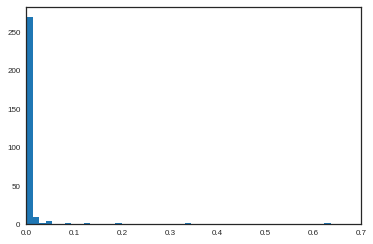

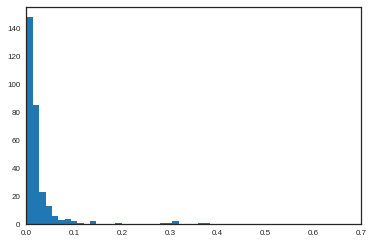

In [99]:
bins = np.linspace(0, 0.65)
plt.hist(challenger_model.feature_importance(impurity_decrease=True)["Importance"], bins=bins)
plt.xlim([-0.001, 0.70])
plt.show()
plt.hist(benchmark_model.feature_importance(impurity_decrease=True)["Importance"], bins=bins)
plt.xlim([-0.001, 0.70])
plt.show()

In [100]:
all_importances.corr()

,Random Forest,Time Robust Forest
Random Forest,1.000000,0.692085
Time Robust Forest,0.692085,1.000000


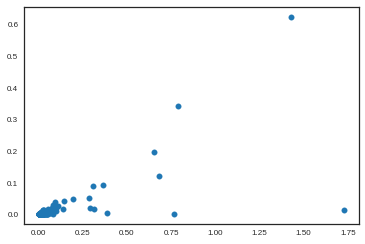

In [101]:
plt.scatter(all_importances["Random Forest"], all_importances["Time Robust Forest"])

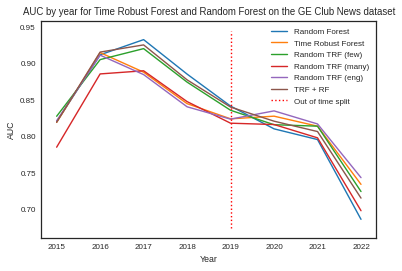

In [92]:
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_few_challenger_prediction"])).plot(label="Random TRF (few)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_many_challenger_prediction"])).plot(label="Random TRF (many)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_eng_challenger_prediction"])).plot(label="Random TRF (eng)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_eng_few_challenger_prediction"])).plot(label="TRF + RF")
# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction_lgbm"])).plot(label="LGBM")

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")


plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.title("AUC by year for Time Robust Forest and Random Forest on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

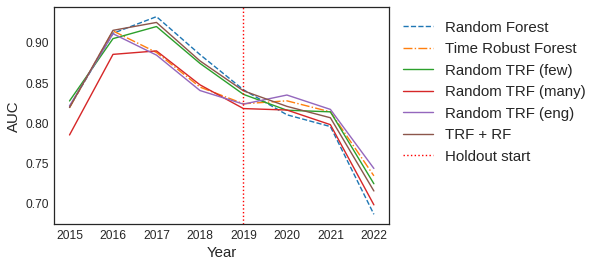

In [105]:
fig, ax = plt.subplots()
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest", 
                                                                                                                              linestyle="dashed")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest", 
                                                                                                                       linestyle="-.")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_few_challenger_prediction"])).plot(label="Random TRF (few)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_many_challenger_prediction"])).plot(label="Random TRF (many)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_eng_challenger_prediction"])).plot(label="Random TRF (eng)")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_eng_few_challenger_prediction"])).plot(label="TRF + RF")

# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest",
#                                                                                                                         color="green", linestyle="dashed")
# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest", 
#                                                                                                                        linestyle="-.")
# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction_lgbm"])).plot(label="LGBM", color="orange")

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

xmin, xmax, ymin, ymax = plt.axis()
plt.ylim([ymin, ymax])
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))

#plt.legend(bbox_to_anchor=(1.05, 1.0))
#plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")

plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
#plt.savefig("images/ge_sklearn.eps", format="eps", bbox_inches="tight")
plt.savefig("genews_performance_overtime_all.eps", format="eps")
plt.show()

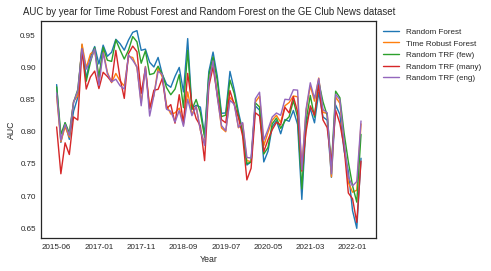

In [94]:
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_few_challenger_prediction"])).plot(label="Random TRF (few)")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_many_challenger_prediction"])).plot(label="Random TRF (many)")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_eng_challenger_prediction"])).plot(label="Random TRF (eng)")

# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction_lgbm"])).plot(label="LGBM")

xmin, xmax, ymin, ymax = plt.axis()
#plt.vlines(3, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")

plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.title("AUC by year for Time Robust Forest and Random Forest on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

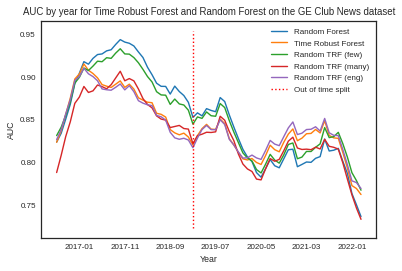

In [90]:
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).rolling(6).mean().plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).rolling(6).mean().plot(label="Time Robust Forest")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_few_challenger_prediction"])).rolling(6).mean().plot(label="Random TRF (few)")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_many_challenger_prediction"])).rolling(6).mean().plot(label="Random TRF (many)")
pd.concat([test, out_of_time]).groupby("year-month").apply(lambda x: roc_auc_score(x[target], x["r_eng_challenger_prediction"])).rolling(6).mean().plot(label="Random TRF (eng)")
# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction_lgbm"])).plot(label="LGBM")

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(35, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")

plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.title("AUC by year for Time Robust Forest and Random Forest on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

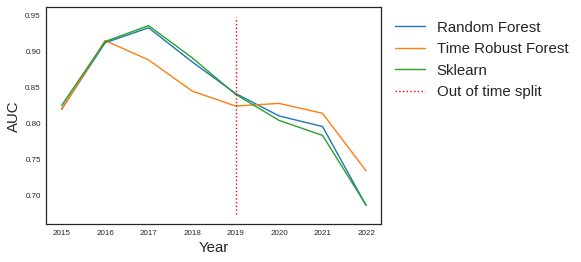

In [91]:
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction"])).plot(label="Sklearn")

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")
plt.legend(bbox_to_anchor=(1.05, 1.0))

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))

#plt.legend(bbox_to_anchor=(1.05, 1.0))
#plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")

plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
#plt.title("AUC by year for Time Robust Forest and Random Forest on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

## Simplified benchmark

Use similar paramters to what the challenger picked in the optimization.

In [ ]:
params_simple_benchmark = challenger_opt_param.copy()
params_simple_benchmark.pop("min_sample_periods")

params_simple_benchmark["min_sample_periods"] = train[time_column].nunique() * challenger_opt_param["min_sample_periods"]

simple_benchmark_model = TimeForestClassifier(time_column=dummy_time_column,
                                       multi=True, 
                                       **params_simple_benchmark)

simple_benchmark_model.fit(train_vectors[features + [dummy_time_column]], train[target])

In [ ]:
params_simple_benchmark

In [ ]:
train["benchmark_simple_prediction"] = simple_benchmark_model.predict_proba(train_vectors[features])[:, 1]
test["benchmark_simple_prediction"] = simple_benchmark_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["benchmark_simple_prediction"] = simple_benchmark_model.predict_proba(oot_vectors[features])[:, 1]

In [89]:
print(roc_auc_score(train[target], train["benchmark_simple_prediction"]))
print(roc_auc_score(test[target], test["benchmark_simple_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["benchmark_simple_prediction"]))

0.9109751234359086
0.8922274573438961
0.8059232890444981


### Even simpler, trying to match the train performance from challengers

In [ ]:
params_simple_benchmark = challenger_opt_param.copy()
params_simple_benchmark.pop("min_sample_periods")
params_simple_benchmark.pop("max_depth")

params_simple_benchmark["min_sample_periods"] = 80 * challenger_opt_param["min_sample_periods"]
params_simple_benchmark["max_depth"] = 3

simple_benchmark_model = TimeForestClassifier(time_column=dummy_time_column,
                                       multi=True, 
                                       **params_simple_benchmark)

simple_benchmark_model.fit(train_vectors[features + [dummy_time_column]], train[target])

In [ ]:
train["benchmark_super_simple_prediction"] = simple_benchmark_model.predict_proba(train_vectors[features])[:, 1]
test["benchmark_super_simple_prediction"] = simple_benchmark_model.predict_proba(test_vectors[features])[:, 1]
out_of_time["benchmark_super_simple_prediction"] = simple_benchmark_model.predict_proba(oot_vectors[features])[:, 1]

In [88]:
print(roc_auc_score(train[target], train["benchmark_super_simple_prediction"]))
print(roc_auc_score(test[target], test["benchmark_super_simple_prediction"]))
print(roc_auc_score(out_of_time[target], out_of_time["benchmark_super_simple_prediction"]))

0.8616185749596906
0.861410776941608
0.7766456346052646


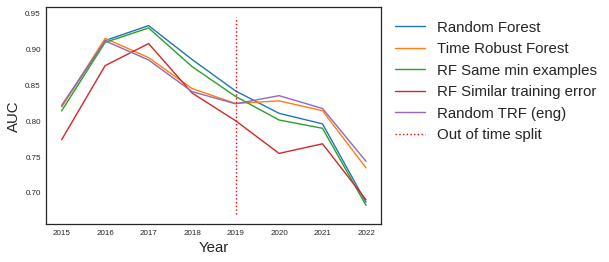

In [87]:
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_simple_prediction"])).plot(label="RF Same min examples")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_super_simple_prediction"])).plot(label="RF Similar training error")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["r_eng_challenger_prediction"])).plot(label="Random TRF (eng)")

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")

plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))

#plt.legend(bbox_to_anchor=(1.05, 1.0))
#plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")

plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
#plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")
plt.show()

## Plots

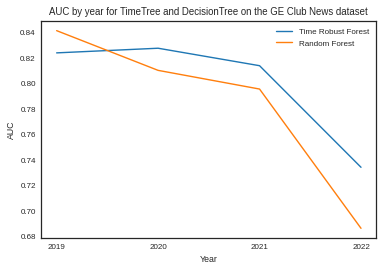

In [102]:
out_of_time.groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")
out_of_time.groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")

plt.legend()
plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

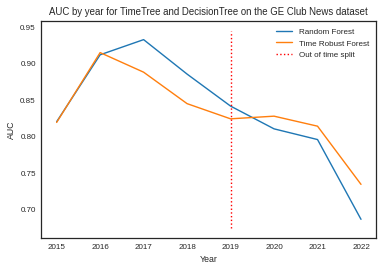

In [103]:
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest")

xmin, xmax, ymin, ymax = plt.axis()
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Out of time split")

plt.legend(bbox_to_anchor=(1.00, 1.0))
plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")
plt.ylabel("AUC")
plt.xlabel("Year")
plt.show()

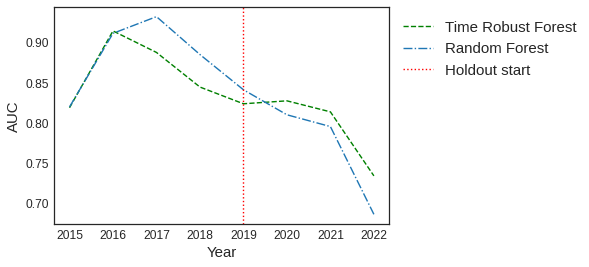

In [104]:
fig, ax = plt.subplots()

pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["challenger_prediction"])).plot(label="Time Robust Forest",
                                                                                                                        color="green", linestyle="dashed")
pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["benchmark_prediction"])).plot(label="Random Forest", 
                                                                                                                       linestyle="-.")
# pd.concat([test, out_of_time]).groupby(time_column).apply(lambda x: roc_auc_score(x[target], x["prediction_lgbm"])).plot(label="LGBM", color="orange")

ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)

xmin, xmax, ymin, ymax = plt.axis()
plt.ylim([ymin, ymax])
plt.vlines(4, ymin, ymax, linestyle="dotted", color="red", label="Holdout start")
#plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.legend(fontsize=15, bbox_to_anchor=(1.0, 1.0))

#plt.legend(bbox_to_anchor=(1.05, 1.0))
#plt.title("AUC by year for TimeTree and DecisionTree on the GE Club News dataset")

plt.ylabel("AUC", fontsize=15)
plt.xlabel("Year", fontsize=15)
#plt.savefig("images/ge_sklearn.eps", format="eps", bbox_inches="tight")
plt.savefig("genews_performance_overtime.eps", format="eps")
plt.show()